In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statsmodels.stats.api as sms
import pylab as py
import scipy.linalg as la
import statistics
import scipy.stats as stats
import scipy

from math import gamma as tma

from scipy.stats import laplace
from scipy.stats import logistic
from scipy.stats import cauchy
from scipy.stats import binom
from scipy.stats import weibull_min as weibull
from scipy.stats import poisson
from scipy.stats import gamma
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import multivariate_normal as mnorm
from scipy.stats import t as studt
from scipy.stats import f as fdist
from scipy.stats import chisquare as chisq
from scipy.stats import chi2
from scipy.stats import gaussian_kde as gkde
from sklearn.neighbors import KernelDensity
import math

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def dxc2(a,t,dof):
    return (chi2.cdf(a, dof)-t)
def invert_chi2(t,dof):
    a = 0
    b = 100.0
    c = (a+b)/2
    tol = 0.00001

    while(abs(dxc2(c,t,dof)) > tol):
        c = (a+b)/2
        if(dxc2(c,t,dof) < 0):
            a = c
        else:
            b = c
    return c

#### Exercise 4.8.1 
Prove the converse of Theorem MCT

Links below give solutions not only to this exercise, but also to that of
#### Exercise 4.8.13

So for 4.8.1, see
https://math.stackexchange.com/a/868405/145325

More generally, i.e for 4.8.13, see
http://www.columbia.edu/~ks20/4404-Sigman/4404-Notes-ITM.pdf
https://people.math.ethz.ch/~embrecht/ftp/generalized_inverse.pdf
https://stats.stackexchange.com/a/212828/183497
https://stats.stackexchange.com/a/77852/183497

#### Exercise 4.8.2
Using a uniform generator,approximate $\log{2}$

In [3]:
n=10000
u=np.random.uniform(0,1,n)
ln2=np.mean([1/(1+ui) for ui in u])

In [4]:
s = statistics.stdev(u) # Sample standard deviation
print(ln2 - 1.96*s/np.sqrt(n), ln2 + 1.96*s/np.sqrt(n))
print(np.log(2),ln2)

0.6890049911092965 0.7003923094485908
0.6931471805599453 0.6946986502789436


#### Exercise 4.8.3
Similar to Exercise 4.8.2 but now approximate 
$$\int\limits_{0}^{1.96}{1 \over \sqrt{2\pi}} e^{(-t^2/2)} \ dt$$

In [5]:
n=10000
u=np.random.uniform(0,1.96,n)
z=[1.96/np.sqrt(2*np.pi)*np.exp(-ut**2/2) for ut in u]
intn = np.mean(z)

intn_ideal = 0.5*(norm.cdf(1.96,loc=0,scale=1)-norm.cdf(-1.96,loc=0,scale=1))

In [6]:
s = statistics.stdev(z) # Sample standard deviation
print(intn - 1.96*s/np.sqrt(n), intn + 1.96*s/np.sqrt(n))
(intn,intn_ideal)

0.4725701288321569 0.481244009910468


(0.47690706937131244, 0.4750021048517795)

#### Exercise 4.8.4

Solution is from https://cs.du.edu/~paulhorn/362/362assn4-solns.pdf

If $X = g(Y)$ (where $g(y)$ is increasing or decreasing) and $Y$ has pdf $f(z)$, then
$$f_X(x) = f(g^{-1}(x)) \left \lvert \frac{d}{dx} g^{-1}(x) \right \rvert$$
We see $f_X(x) = b^{−1}f((x − a)/b)$ is of this form, where $g^{−1}(x) = (x−a)/b$.
That is $g(y) = by +a$. In other words, if we can generate $Y$ with pdf $f(z)$,
we can find $X$ with pdf $f_X(x)$ by taking $X = bY + a$.

#### Exercise 4.8.5

Determine a method to generate random observations for the logistic pdf, $(4.4.11)$. Write an R function that returns a random sample of observations from a logistic distribution. Use your function to generate $10,000$ observations from this pdf. Then obtain a histogram (use hist($x,pr=T$), where $x$ contains the observations). On this histogram overlay a plot of the pdf.

In [7]:
n=10000
u=np.random.uniform(0,1,n)
z=[np.log((1-ui)/ui) for ui in u]

In [8]:
x=[i/100 for i in range(-1000,1001,1)]
est=logistic.pdf(x,loc=0,scale=1)

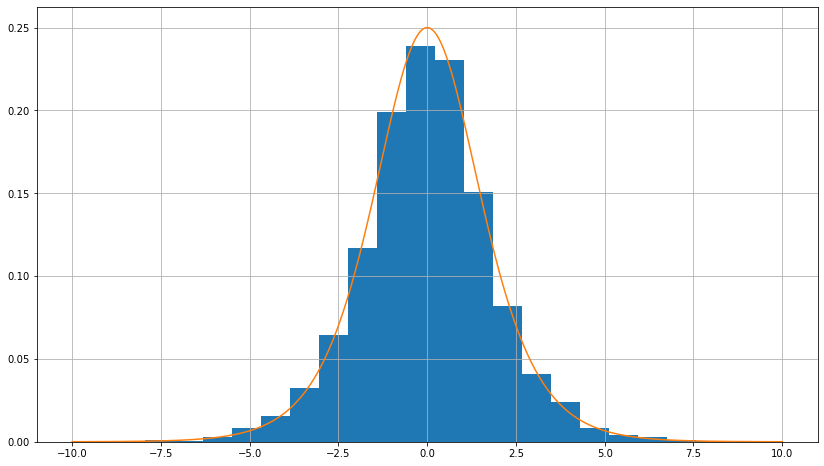

In [9]:
plt.figure(figsize = (14,8))
plt.hist(z,bins = 20,density = True)
plt.plot(x,est)
plt.grid()
plt.show()

#### Exercise 4.8.6

Determine a method to generate random observations for the following pdf: 􏰚 
$$ \begin{align} f(x) &= 4x^3, 0 < x < 1, \\
&=0, \: \: \: \: \textrm{elsewhere.} \end{align}$$
Write an R function that returns a random sample of observations from this pdf.

In [10]:
n=10000
u=np.random.uniform(0,1,n)
z=[np.sqrt(np.sqrt(ui)) for ui in u] # F(x) = x**4 so that F^(-1)(u) = sqrt(sqrt(u))

In [11]:
x=[(i/100) for i in range(101)]
est=[4*xi**3 for xi in x]

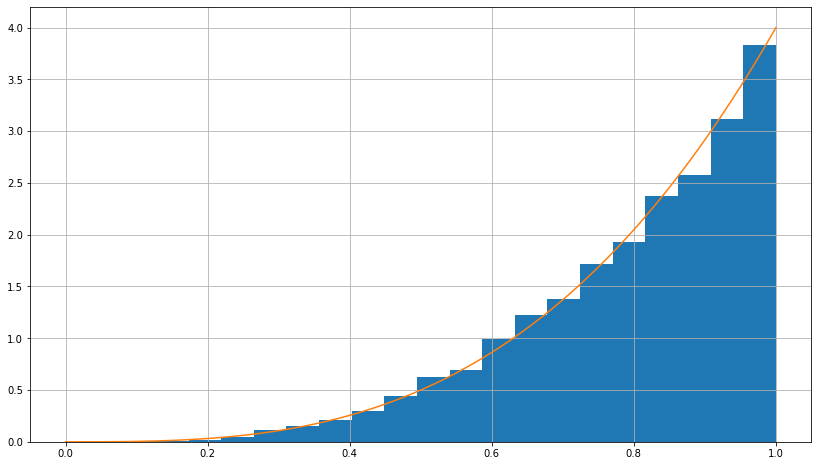

In [12]:
plt.figure(figsize = (14,8))
plt.hist(z,bins = 20,density = True)
plt.plot(x,est)
plt.grid()
plt.show()

#### Exercise 4.8.7
Obtain the inverse function of the cdf of the Laplace pdf, given by $$f(x) = (1/2)e^{−|x|}, \textrm{for} −\infty < x < \infty.$$ Write an R function that returns a random sample of observations from this distribution.

$$ \begin{align} F^{-1}(u) &= \log{2u}, \: \: \: \: \: \: \: \: \: \: \: \: 0 < x < 0.5, \\
&= \log{1/(2-2u)}, \: \textrm{elsewhere.} \end{align}$$

In [13]:
n=10000
u=np.random.uniform(0,1,n)
z = [np.log(2*ui) if (ui<0.5) else np.log(1/(2-2*ui)) for ui in u]

In [14]:
x=[i/100 for i in range(-1000,1001,1)]
est=laplace.pdf(x,loc=0,scale=1)

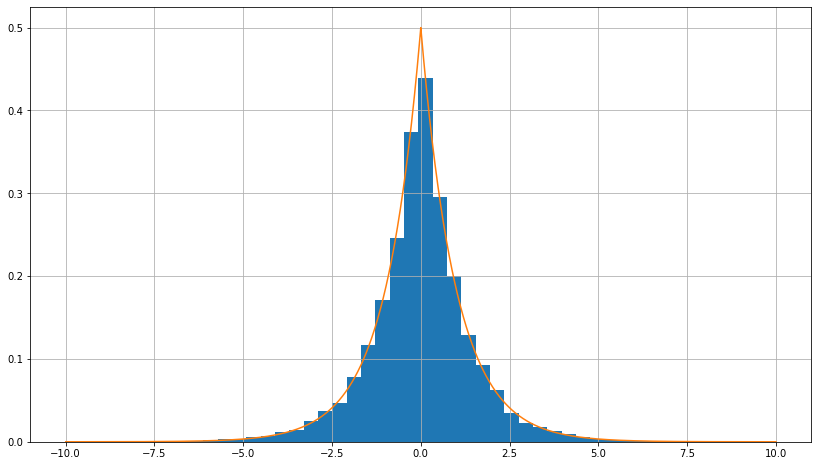

In [15]:
plt.figure(figsize = (14,8))
plt.hist(z,bins = 41,density = True)
plt.plot(x,est)
plt.grid()
plt.show()

#### Exercise 4.8.8

Determine a method to generate random observations for the extreme-valued pdf that is given by
$$f(x)=exp\{x−e^x\}, -\infty < x < \infty.$$
Write an R function that returns a random sample of observations from an extreme-valued distribution. Use your function to generate $10,000$ observations from this pdf.

The cdf is given by
$$F(x) = 1-exp\{-e^x\}.$$
So we have $$F^{-1}(u) = \log(\log(\frac{1}{1-u})).$$

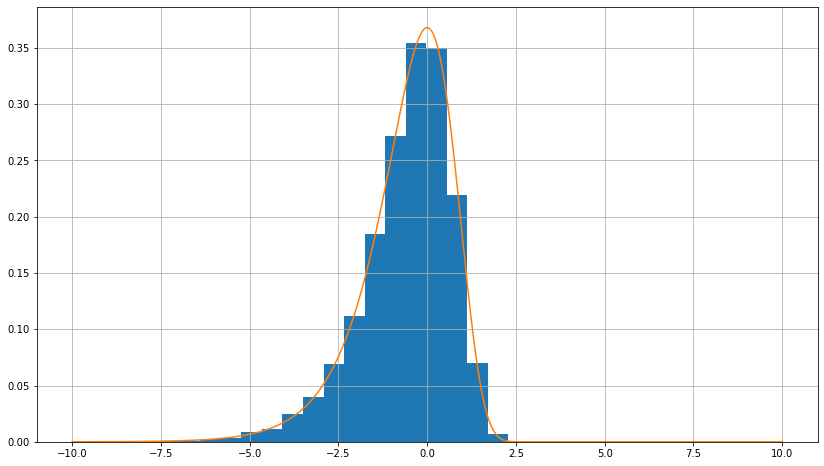

In [16]:
n=10000
u=np.random.uniform(0,1,n)
z = [np.log(np.log(1/(1-ui))) for ui in u]

x=[i/100 for i in range(-1000,1001,1)]
est=[np.exp(xi-np.exp(xi)) for xi in x]

plt.figure(figsize = (14,8))
plt.hist(z,bins = 21,density = True)
plt.plot(x,est)
plt.grid()
plt.show()

#### Exercise 4.8.9

Determine a method to generate random observations for the Cauchy distribution with pdf
$$f(x) = \frac{1}{\pi(1 + x^2)}.$$
Write an R function that returns a random sample of observations from this Cauchy distribution.

CDF is $$F(x) = \frac{1}{2} + \frac{\arctan(x)}{\pi}.$$
Hence we have $$F^{-1}(u) = \tan \left \{ {\pi u - \frac{\pi}{2}} \right \}.$$

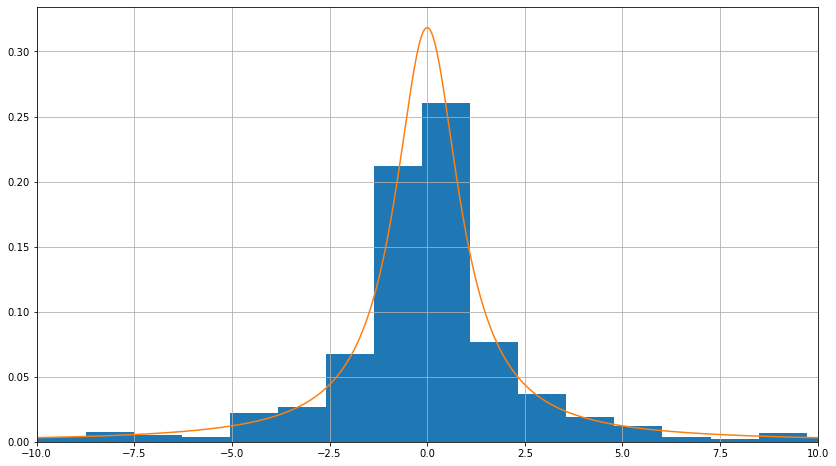

In [17]:
n=1000
u=np.random.uniform(0,1,n)
cpi = np.pi
z = [np.tan(cpi*(ui-0.5)) for ui in u]

x=[i/100 for i in range(-1000,1001,1)]
est=cauchy.pdf(x,loc=0,scale=1)

plt.figure(figsize = (14,8))
plt.hist(z,bins = n,density = True)
plt.plot(x,est)
plt.xlim([-10,10])
plt.grid()
plt.show()

#### Exercise 4.8.10

Suppose we are interested in a particular Weibull distribution with pdf 􏰚 
$$ \begin{align} f(x) &= \frac{1}{\theta^3}3x^2e^{-x^3/\theta^3}, 0 < x < 1, \\
&=0, \: \: \: \: \textrm{elsewhere.} \end{align}$$
Determine a method to generate random observations from this Weibull distribution. Write an R function that returns such a sample.

Hint: Find $F^{−1}(u)$.

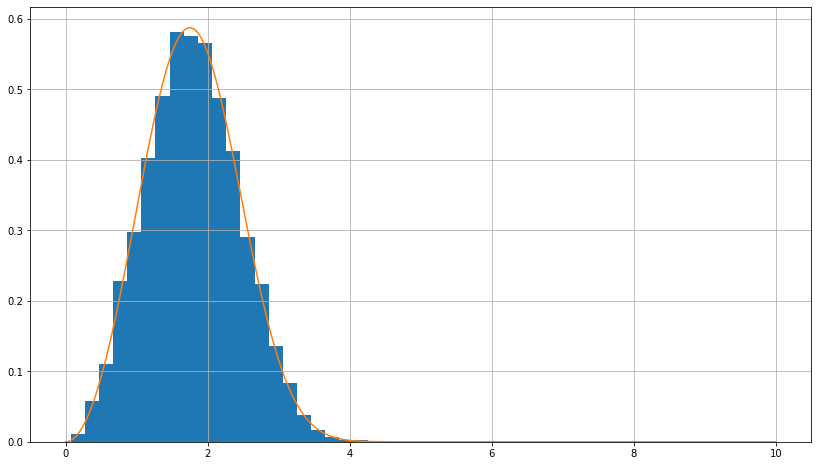

In [18]:
n=10000
u=np.random.uniform(0,1,n)
tt = 2
z = [tt*(np.log(1/(1-ui)))**(1/3) for ui in u]

x=[i/100 for i in range(1001)]
est=weibull.pdf(x, 3, loc=0, scale=tt)

plt.figure(figsize = (14,8))
plt.hist(z,bins = 21,density = True)
plt.plot(x,est)
plt.grid()
plt.show()

#### Exercise 4.8.11

Consider the situation in Example $4.8.6$ with the hypotheses $(4.8.3)$. Write an algorithm that simulates the power of the test $(4.8.4)$ to detect the alternative $\mu = 0.5$ under the same contaminated normal distribution as in the example. Modify the R function *empalphacn(N)* to simulate this power and to obtain an estimate of the error of estimation.

In [19]:
def contaminated_norm(mu,sigmac,eps,n):
    mychoices = np.random.choice(np.arange(0, 2), p=[0.75, 0.25],size=n)
    mynorm = np.random.normal(loc=mu,scale=1,size=n)
    mynormc = np.random.normal(loc=mu,scale=sigmac,size=n)
    mysamples = [(1-a)*x+a*y for (a,x,y) in zip(mychoices,mynorm,mynormc)]
    return mysamples

In [20]:
def empalphacn(nsims,mu):
    sigmac = 25
    eps = 0.25
    alpha = 0.05
    n = 20
    tc = studt.ppf(1-alpha, n-1)
    ic = 0
    for i in range(nsims):
        samp = contaminated_norm(mu,sigmac,eps,n)
        ttest = (np.sqrt(n) * (np.mean(samp) -mu)) / (np.std(samp,ddof=1))
        if ttest > tc:
            ic += 1
    empalp = ic / nsims
    err = 1.96 * np.sqrt((empalp * (1-empalp)) / nsims)
    return {'empiricalalpha': empalp, 'error': err}


In [21]:
empalphacn(10000,0.5)

{'empiricalalpha': 0.0415, 'error': 0.003909094580590242}

#### Exercise 4.8.12

For the last exercise, write an algorithm to simulate the significance level and power to detect the alternative $\mu = 0.5$ for the test $(4.8.4)$ when the underlying distribution is the logistic distribution $(4.4.11)$.

In [22]:
def contaminated_logistic(mu,sigmac,eps,n):
    mychoices = np.random.choice(np.arange(0, 2), p=[0.75, 0.25],size=n)
    mynorm = logistic.rvs(loc=mu, scale=1, size=n, random_state=None)
    mynormc = logistic.rvs(loc=mu, scale=sigmac, size=n, random_state=None)
    mysamples = [(1-a)*x+a*y for (a,x,y) in zip(mychoices,mynorm,mynormc)]
    return mysamples

In [23]:
def empalphacl(nsims,mu):
    sigmac = 25
    eps = 0.25
    alpha = 0.05
    n = 20
    tc = studt.ppf(1-alpha, n-1)
    ic = 0
    for i in range(nsims):
        samp = contaminated_logistic(mu,sigmac,eps,n)
        ttest = (np.sqrt(n) * (np.mean(samp) -mu)) / (np.std(samp,ddof=1))
        if ttest > tc:
            ic += 1
    empalp = ic / nsims
    err = 1.96 * np.sqrt((empalp * (1-empalp)) / nsims)
    return {'empiricalalpha': empalp, 'error': err}

In [24]:
empalphacl(10000,0.5)

{'empiricalalpha': 0.0378, 'error': 0.003737959981808259}

#### Exercise 4.8.13

For the proof of Theorem $4.8.1$, we assumed that the cdf was strictly increasing over its support. Consider a random variable $X$ with cdf $F(x)$ that is not strictly increasing. Define as the inverse of $F (x)$ the function
$$F^{−1}(u)=inf\{x:F(x)\geq u\}, 0<u<1.$$ 
Let $U$ have a uniform $(0,1)$ distribution. Prove that the random variable $F^{−1}(U)$ has cdf $F(x)$.

#### Useful resources

Short but airtight proof is in https://math.stackexchange.com/a/789958/145325

Another proof is in https://math.stackexchange.com/a/1201497/145325

A lot of useful information can be found in the following links

1. https://stats.stackexchange.com/a/77852/183497
2. https://stats.stackexchange.com/a/212828/183497
3. https://math.stackexchange.com/a/3713597/145325
4. https://people.math.ethz.ch/~embrecht/ftp/generalized_inverse.pdf


#### Exercises 4.8.14 and 4.8.15
Very straightforward

#### Exercise 4.8.16
Again straightforward except maybe the integral which quite easily integrates to the exponential in the given expression as it is the marginal integral, and we hold $x_1$ fixed and integrate $x_2$ from $0$ to $1$.

#### Exercises 4.8.17
Skipping this as well as it is very straightforward

#### Exercises 4.8.18

Consider the pdf

$$ f(x) = 
\left\{\begin{array}{ll}
\beta x^{\beta-1} & 0 < x < 1 \\
0 & \text { elsewhere } 
\end{array}\right.
$$

for β > 1.

(a) Use Theorem $4.8.1$ to generate an observation from this pdf.

(b) Use the accept–reject algorithm to generate an observation from this pdf.

In [25]:
# Part (a). We choose beta to be some arbitrary number greater than one as it is not specified.

b = 4.6

n=10000
u=np.random.uniform(0,1,n)
z=[ui**(1/b) for ui in u] # F(x) = x**b so that F^(-1)(u) = u**(1/b)

In [26]:
# Here we choose the instrumental pdf as that of uniform pdf as x**(b) < 1 as long as 0 < x < b
# So in the notation of Algorithm 4.8.1 of the text, both Y and U are uniformly distributed, and M=beta, for us.
x=[]
y=np.random.uniform(0,1,n)
for i in range(n):
    yi = y[i]
    ui = u[i]
    if(yi < b*ui**(b-1)/b):
        x.append(ui)

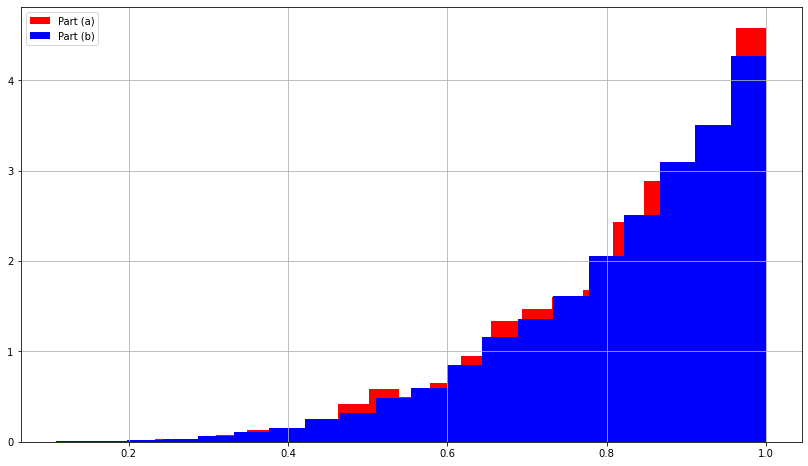

In [27]:
plt.figure(figsize = (14,8))
plt.hist(x,bins = 20,density = True,color='r')
plt.hist(z,bins = 20,density = True,color='b')
plt.legend(['Part (a)','Part (b)'])
plt.grid()
plt.show()

#### Exercises 4.8.19

Proceeding similar to Example $4.8.7$, use the accept–reject algorithm to generate an observation from a t-distribution with $r > 1$ degrees of freedom when $g(x)$ is the Cauchy pdf.

I was able to prove that the ratio of t-distribution pdf to that of Cauchy has a maxima at $t=\pm 1$. The value depends on the parameter $r$ and the Gamma function operates on it. It is given by
$$
\frac{f(1)}{g(1)} = 2\sqrt{\frac{\pi}{r}}\frac{\Gamma \left ( \frac{r+1}{2} \right )}{\Gamma \left( {\frac{r}{2}}\right)} \frac{1}{\left(1+\frac{1}{r}\right)^{(r+1)/2}}
$$
I simply plotted the ratio, found that value of maxima, in order to confirm that my analysis is correct.

In [28]:
n=10000
u=np.random.uniform(0,1,n)
cpi = np.pi
z_cauchy = [np.tan(cpi*(ui-0.5)) for ui in u]

In [29]:
x=[i/100 for i in range(-1000,1001,1)]
estc=cauchy.pdf(x,loc=0,scale=1)

r=4.0
estt=studt.pdf(x,r,loc=0,scale=1)

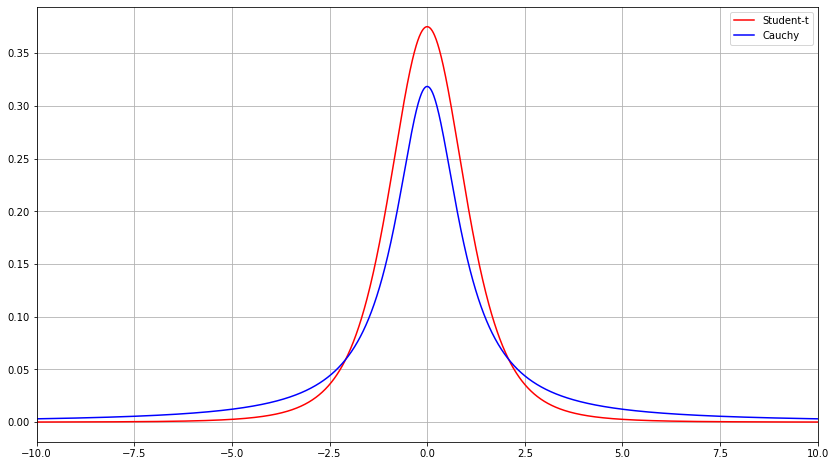

In [30]:
plt.figure(figsize = (14,8))
plt.plot(x,estt,color='r')
plt.plot(x,estc,color='b')
plt.legend(['Student-t','Cauchy'])
plt.xlim([-10,10])
plt.grid()
plt.show()

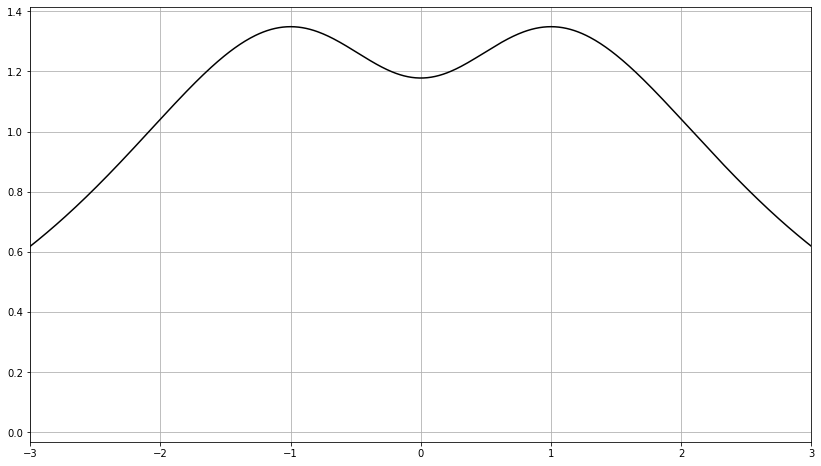

In [31]:
plt.figure(figsize = (14,8))
plt.plot(x,[et/ec for (et,ec) in zip(estt,estc)],color='k')
plt.xlim([-3,3])
plt.grid()
plt.show()

In [32]:
# As can be seen below, the maxima found through calculations and through simulation match quite well

print(2*np.sqrt(cpi/r)*tma((1+r)/2)/tma(r/2)/(1+1/r)**((1+r)/2),np.max([et/ec for (et,ec) in zip(estt,estc)]))

1.3487644283598197 1.3487644283598195


In [33]:
m = np.ceil(2*np.sqrt(cpi/r)*tma((1+r)/2)/tma(r/2)/(1+1/r)**((1+r)/2)) # Taking the acceptance-rate constant as the
# nearest integer above this bound

In [34]:
def cpdf(y):
    return 1/cpi/(1+y*y)
def tpdf(y,r):
    return tma((1+r)/2)/tma(r/2)/np.sqrt(np.pi*r)/(1+y*y/r)**((1+r)/2)

In [35]:
xt=[]
u=np.random.uniform(0,1,n)
for i in range(n):
    yi = z_cauchy[i]
    ui = u[i]
    bound = tpdf(yi,r)/cpdf(yi)/m
    if(ui < bound):
        xt.append(yi)

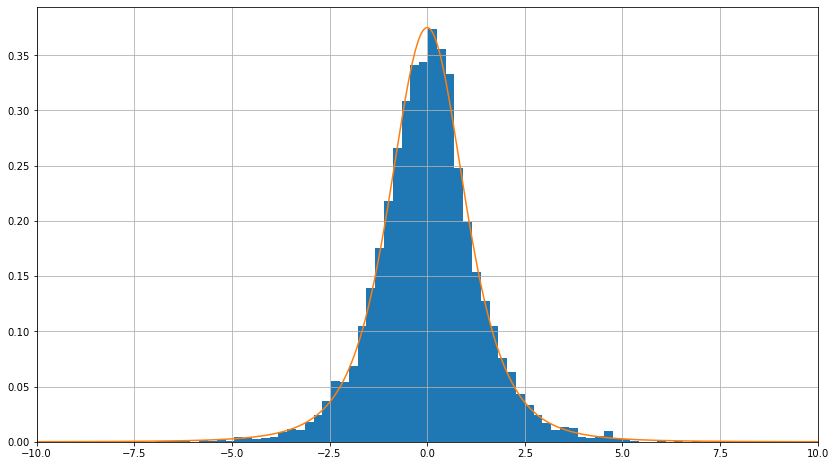

In [36]:
plt.figure(figsize = (14,8))
plt.hist(xt,bins = 101,density = True)
plt.plot(x,estt)
plt.xlim([-10,10])
plt.grid()
plt.show()

#### Exercises 4.8.20

For $\alpha > 0$ and $\beta > 0$, consider the following accept–reject algorithm:

1. Generate $U_1$ and $U_2$ iid uniform$(0,1)$ random variables. Set $V_1 = U_1^{1/\alpha}$ and $V_2 =U_2^{1/\beta}$.

2. Set $W = V_1 + V_2$. If $W \leq 1$, set $X = V_1/W$; else go to step 1.

3. Deliver X.

Show that X has a beta distribution with parameters $\alpha$ and $\beta$, (3.3.9). See Kennedy and Gentle (1980).

#### Proof outline:

One proof is in https://stats.stackexchange.com/a/80959/183497

Following is my proof.

Basically using Theorem $(4.8.1)$, we get that the cdf of $V_1$ and $V_2$ are $F_{V_1}(v_1) = v_1^\alpha$ and $F_{V_2}(v_2) = v_2^\beta$. We want 
$$
\begin{array}{ccl}
F_X(x) &= P(X \leq x) &= P\left(V_1/(V_1+V2 \leq x) \bigr\rvert V_1 + V_2 \leq 1 \right) \\
&&= \cfrac{P \left( \frac{V_1}{V_1+V_2} \leq x, V_1+V_2 \leq 1 \right)}{P\left( V_1 + V_2 \leq 1\right)} \\
\end{array}
$$

Consider the transformations $Y = V_1/(V_1+V_2)$ and the given $W = V_1+V_2$. Then we have $V_1 = YW$ and $V_2 = W-YW$, the Jacobian would be $W$ and so the joint pdf ends up being
\begin{array}{ll}
f_{Y,W}(y,w) &= \alpha(yw)^{\alpha-1}\beta(w-yw)^{\beta-1} \times w \\
&= \alpha \beta w^{\alpha + \beta -1} y^{\alpha -1 }(1-y)^{\beta - 1}
\end{array}

**Check if joint pdf integrates to $1$:**

As $v_1$ and $v_2$ change from $0$ to $1$ ($0$ and $1$ are not a part of the support as question specifically mentions "uniform$(0,1)$"), the transformed variable $y$ changes from $0$ to $1$ while $w$ changes from $0$ to $2$. However, as $v_1 < 1$, $yw < 1$. Also, $v_2 < 1$ implies $w-yw < 1$ which leads to additional constraints on the integration limits as $(w-1)/w < y < 1/w$ (this is valid as $0 < w < 2$). 

These constraints when expressed for $w$ in terms of $y$ end up being

$$
\begin{array}{ll}
0 < w < \frac{1}{1-y} & \text{, if } 0 < y < 1/2 \text{,} \\
0 < w < \frac{1}{y} & \text{, if } 1/2 < y < 1 \text{.}
\end{array}
$$

In order to establish that the region of integration is correct, we obtain a scatter plot of $W$ and $Y$ to check if this indeed is the region of integration.

In [41]:
n=100000
u1=np.random.uniform(0,1,n)
u2=np.random.uniform(0,1,n)
a = 2
b = 3

v1 = [u1i**(1/a) for u1i in u1]
v2 = [u2i**(1/b) for u2i in u2]

w = [i+j for (i,j) in zip(v1,v2)]
y = [i/(i+j) for (i,j) in zip(v1,v2)]

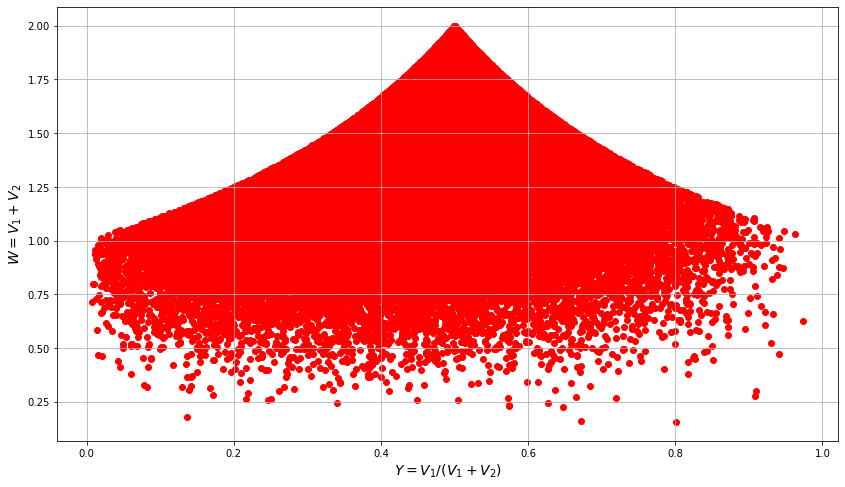

In [42]:
plt.figure(figsize = (14,8))
plt.scatter(y,w,color='r')
plt.ylabel('$W=V_1+V_2$',fontsize=14,fontweight='bold')
plt.xlabel('$Y= V_1/(V_1+V_2)$',fontsize=14,fontweight='bold')
plt.grid()
plt.show()

The scatter plot does not have that many points in the region $W < 1$ (relatively) but it nevertheless shows that the rregion of integration is correct.

We now need to show that
$$
\int_0^{1/2} \int_{0}^{1/(1-y)} f_{Y,W}(y,w) dw dy + \int_{1/2}^{1} \int_{0}^{1/y} f_{Y,W}(y,w) dw dy = 1.
$$

Now

$$
\begin{array}{ll}
\int_0^{1/2} \int_{0}^{1/(1-y)} \alpha \beta w^{\alpha + \beta -1} y^{\alpha -1 }(1-y)^{\beta - 1} dw dy + \int_{1/2}^{1} \int_{0}^{1/y} \alpha \beta w^{\alpha + \beta -1} y^{\alpha -1 }(1-y)^{\beta - 1} \\
=  \frac{\alpha \beta}{\alpha + \beta} \left\{ \int_0^{1/2} \frac{y^{\alpha -1 }}{(1-y)^{\alpha + 1}} dy + \int_{1/2}^{1} \frac{(1-y)^{\beta - 1}}{y^{\beta +1 }} dy \right\}\\
= \frac{\alpha \beta}{\alpha + \beta} \left\{ \frac{1}{\alpha} + \frac{1}{\beta} \right\} \\
=1.
\end{array}
$$

This establishes that the derived joint pdf is valid!

**Derivation of $F_X(x):$**

Now that we have established that the joint pdf is valid, we evaluate the numerator and the denominator of the expression for $F_X(x)$. As the conditional probability involves the region where $w \leq 1$, we just have to integrate the joint pdf in the region $0 < y < 1$ and $0 < w \leq 1$.

$$
\begin{array}{ll}
P \left( \frac{V_1}{V_1+V_2} \leq x, V_1+V_2 \leq 1 \right) &= P \left( Y \leq x, W \leq 1 \right)\\
&= \int_0^{x} \int_{0}^{1} \alpha \beta w^{\alpha + \beta -1} y^{\alpha -1 }(1-y)^{\beta - 1} dw dy \\
&= \frac{\alpha \beta}{\alpha + \beta} \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)} I(x,\alpha,\beta)
\end{array}
$$

where $I(x,\alpha,\beta)$ is the [incomplete beta function which is the standard beta distribution cdf according to Wikipedia][3]. Next, the denominator in the expression for $F_X(x)$ is

$$
\begin{array}{ll}
P \left( V_1+V_2 \leq 1 \right) &= P \left( W \leq 1 \right)\\
&= \int_0^{1} \int_{0}^{1} \alpha \beta w^{\alpha + \beta -1} y^{\alpha -1 }(1-y)^{\beta - 1} dw dy \\
&= \frac{\alpha \beta}{\alpha + \beta} \frac{\Gamma(\alpha) \Gamma(\beta)}{\Gamma(\alpha + \beta)}
\end{array}
$$

and thus we can finally conclude that $F_X(x) = I(x,\alpha,\beta)$.


  [1]: https://stats.stackexchange.com/a/80959/183497
  [2]: https://en.wikipedia.org/wiki/Probability_integral_transform#Statement
  [3]: https://en.wikipedia.org/wiki/Beta_function#Incomplete_beta_function

#### Exercises 4.8.21

Consider the following algorithm:

1. Generate U and V independent uniform $(−1, 1)$ random variables.

2. Set $W=U^2+V^2$.

3. If $W>1$ go to step $1$.
􏰡
4. Set $Z = \sqrt{(−2 \log{W} )/W}$ and let $X_1 = U Z$ and $X_2 = V Z$.

Show that the random variables $X_1$ and $X_2$ are iid with a common N$(0,1)$ distribution. This algorithm was proposed by Marsaglia and Bray $(1964)$.

Proof is in the solutions manual!